In [9]:
# Replace 'your_file.csv' with your actual filename
open("model_results_voting_ensemble_table.csv", "w").close()


In [11]:
import csv

# Define headers
headers = ["Model","Accuracy", "Precision", "Recall"]

# Open file in write mode and write headers
with open("model_results_voting_ensemble_table.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(headers)

In [12]:
import pandas as pd

file_path = "model_results_voting_ensemble_table.csv"

# Load the CSV
df = pd.read_csv(file_path)

# Round all numeric columns to 3 decimals
df = df.round(3)

# Overwrite the same file
df.to_csv(file_path, index=False, float_format="%.3f")

print("CSV file updated with 3 decimal places.")


CSV file updated with 3 decimal places.


In [13]:
#Calculate F-1 score for each model
import pandas as pd

file_path = "model_results_voting_ensemble_table.csv"

# Load CSV
df = pd.read_csv(file_path)

# Calculate F1 Score safely (avoid division by zero)
df["F1"] = df.apply(
    lambda row: (2 * row["Precision"] * row["Recall"]) / (row["Precision"] + row["Recall"])
    if (row["Precision"] + row["Recall"]) > 0 else 0, axis=1
)

# Round all numeric values to 3 decimals
df = df.round(3)

# Save back to CSV (overwrite)
df.to_csv(file_path, index=False, float_format="%.3f")

print("✅ F1 Score column added and CSV updated!")


✅ F1 Score column added and CSV updated!


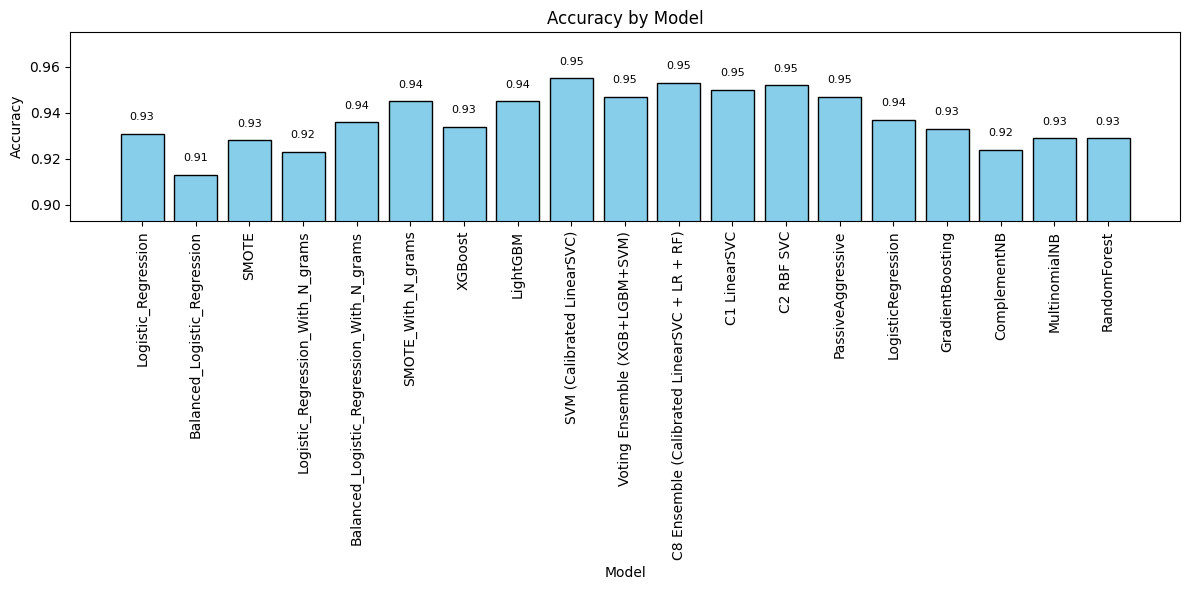

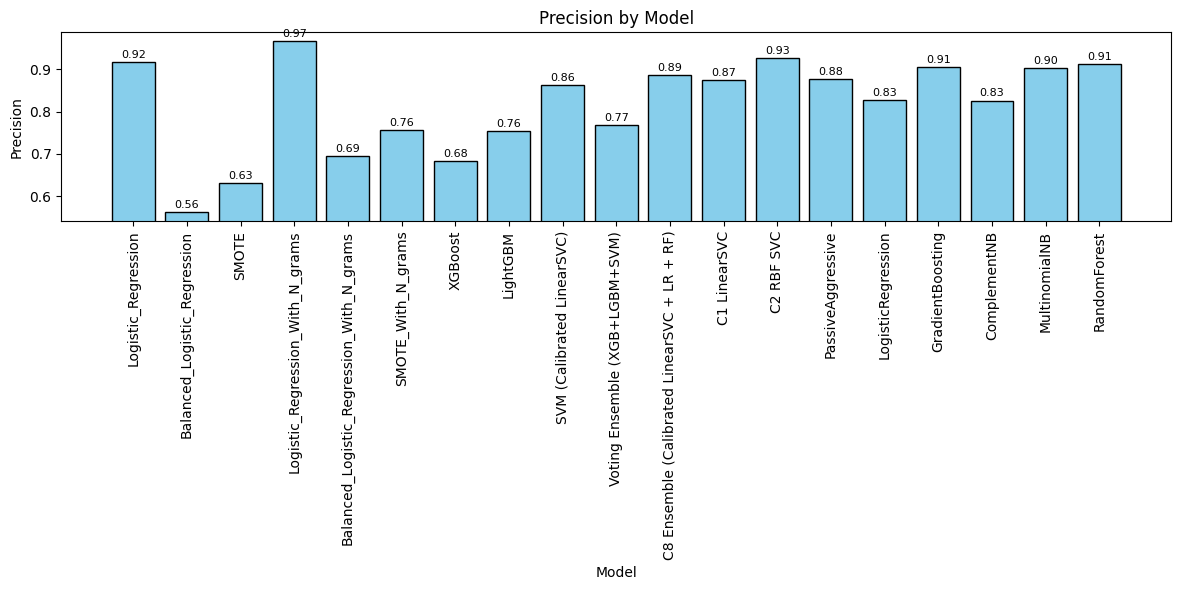

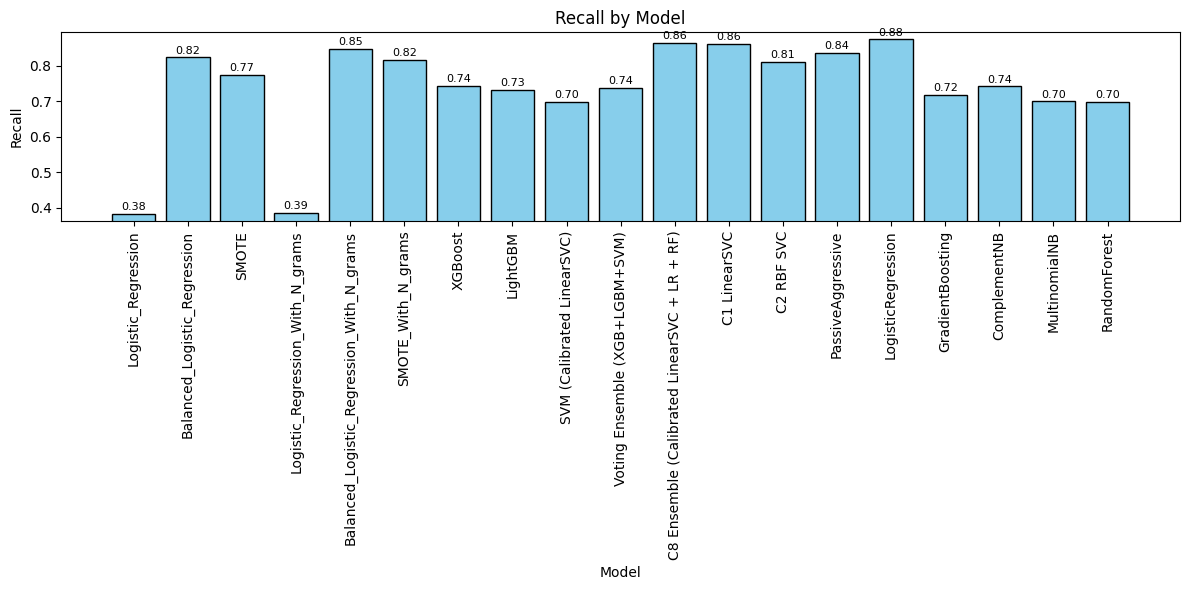

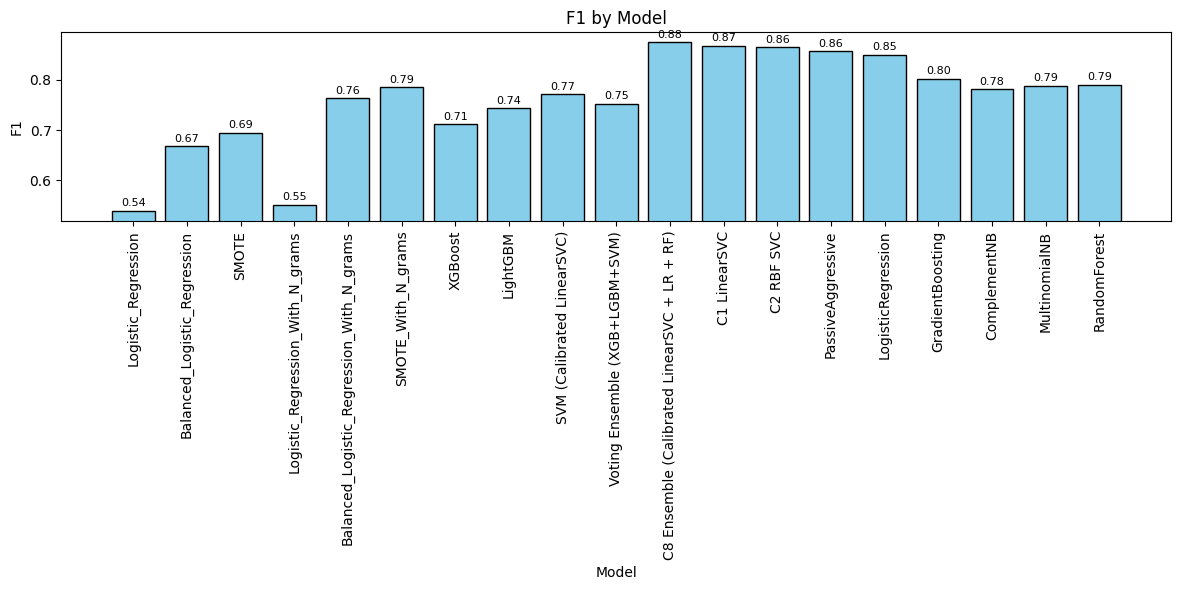

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
file_path = "model_results_voting_ensemble_table.csv"
df = pd.read_csv(file_path)

# List of metrics to plot
metrics = ["Accuracy", "Precision", "Recall", "F1"]

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.bar(df["Model"], df[metric], color="skyblue", edgecolor="black")

    # Rotate model names for readability
    plt.xticks(rotation=90)
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.title(f"{metric} by Model")

    # 🔑 Adjust y-axis to zoom in around min & max values
    ymin = df[metric].min() - 0.02   # a little below the lowest
    ymax = df[metric].max() + 0.02   # a little above the highest
    plt.ylim(ymin, ymax)

    # Add values above bars for clarity
    for i, val in enumerate(df[metric]):
        plt.text(i, val + 0.005, f"{val:.2f}", ha='center', va='bottom', fontsize=8)

    plt.tight_layout()

    # ✅ Save the figure
    plt.savefig(f"{metric}_by_Model.png", dpi=300, bbox_inches="tight")

    plt.show()



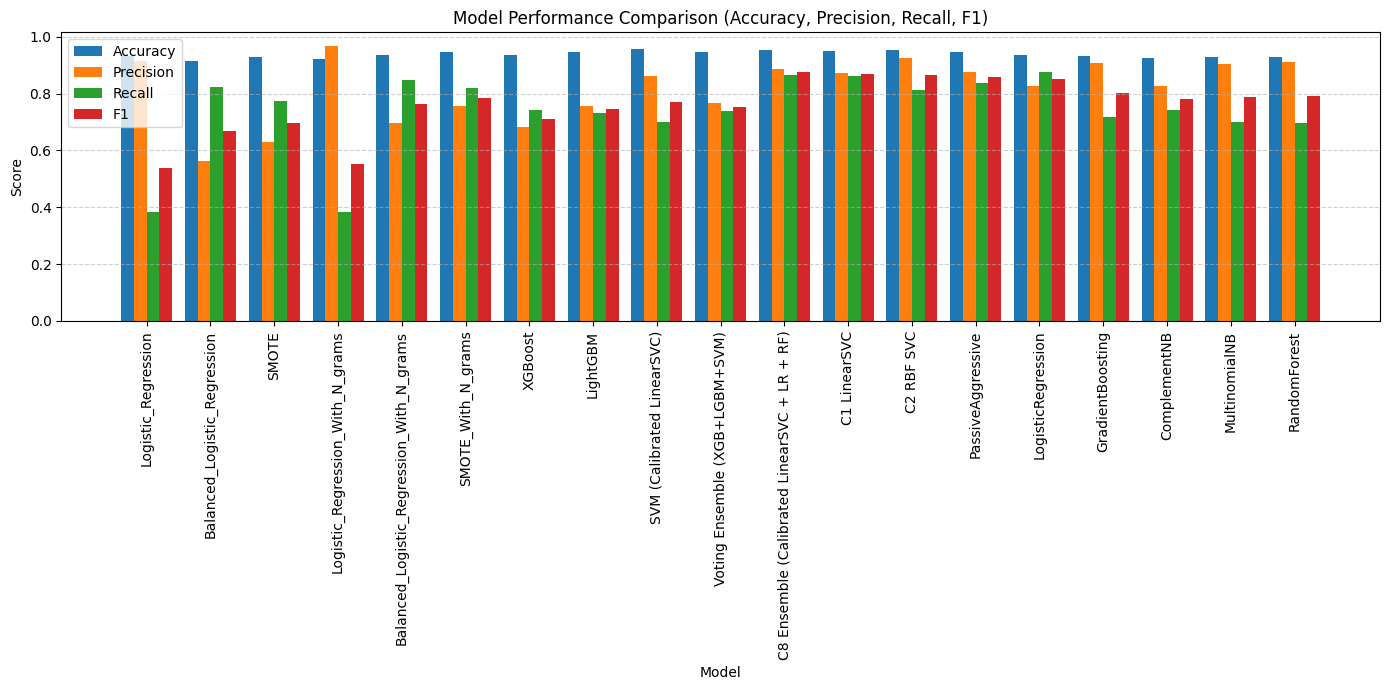

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV
file_path = "model_results_voting_ensemble_table.csv"
df = pd.read_csv(file_path)

# Metrics to plot
metrics = ["Accuracy", "Precision", "Recall", "F1"]

# Set figure size
plt.figure(figsize=(14, 7))

# Number of models
n_models = len(df["Model"])
x = np.arange(n_models)  # positions for models
bar_width = 0.2          # width of each bar

# Plot each metric side by side
for i, metric in enumerate(metrics):
    plt.bar(x + i*bar_width, df[metric], width=bar_width, label=metric)

# Labels and title
plt.xticks(x + bar_width*1.5, df["Model"], rotation=90)
plt.ylabel("Score")
plt.xlabel("Model")
plt.title("Model Performance Comparison (Accuracy, Precision, Recall, F1)")
plt.legend()

# Add grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()

# ✅ Save the figure
plt.savefig("Model_Performance_Comparison.png", dpi=300, bbox_inches="tight")

plt.show()
